# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [12]:
# import libraries here
import pandas as pd
import numpy as np
from functools import reduce
import statistics as stat
from scipy import stats as st
import scipy.stats as st
import seaborn as sns
from collections import Counter
import pylab as plt

In [9]:
!pip install seaborn

You should consider upgrading via the 'c:\users\ffrei\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [42]:
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

In [4]:
!pip install scipy

You should consider upgrading via the 'c:\users\ffrei\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [17]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [18]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

We have 3 variables (City [qualitative], State [qualitative] and Temperature [quantitative]) over 7 observations. Regarding the first 2, given their type, we can only look a its mode, ie, most frequent city/ state:

In [24]:
mode_city = stat.mode(temp.City)
mode_state = stat.mode(temp.State)

print('City with most observation is:', mode_city, 'which belongs to the State of:', mode_state)

City with most observation is: NYC which belongs to the State of: New York


As the temperature being a measure, we can describe quantitative statistics:

In [25]:
# your answer here
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7.0,15.15873,6.695265,3.333333,11.944444,17.222222,19.722222,22.222222


#### Select the rows where state is New York

In [28]:
# your answer here
temp.loc[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [48]:
# your answer here
temp.loc[temp.State == 'New York'].mean()

Temperature    10.740741
dtype: float64

In [46]:
temp.groupby('State').mean().Temperature

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [49]:
# your answer here
temp.loc[(temp['Temperature'] > 15)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [51]:
# your answer here
temp.loc[(temp['Temperature'] > 15)].groupby('City').sum().Temperature

City
Hartford    17.222222
NYC         19.444444
Newark      20.000000
Treton      22.222222
Name: Temperature, dtype: float64

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [53]:
# your answer here
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)].groupby('City').sum().Temperature

City
Hartford    17.222222
NYC         19.444444
Name: Temperature, dtype: float64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [55]:
# your answer here
temp.groupby('State').describe().T

State              Connecticut  New Jersey   New York
Temperature count     2.000000    2.000000   3.000000
            mean     15.833333   21.111111  10.740741
            std       1.964186    1.571348   8.133404
            min      14.444444   20.000000   3.333333
            25%      15.138889   20.555556   6.388889
            50%      15.833333   21.111111   9.444444
            75%      16.527778   21.666667  14.444444
            max      17.222222   22.222222  19.444444

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [83]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the employee dataframe. Comment your results

In [84]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [85]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


All the variables are categorical, except for the Years and Salary which are integers (according to expectations)

#### What's the average salary in this company?

In [86]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [87]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [88]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [191]:
employee[(employee['Salary']) == employee.Salary.min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [99]:
# your answer here
employee.loc[(employee['Name'] == 'David')]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [102]:
# your answer here
employee.loc[(employee['Name'] == 'David')].sum().Salary

30

#### Print all the rows where job title is associate

In [103]:
# your answer here
employee.loc[(employee['Title'] == 'associate')]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [104]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [107]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [116]:
# your answer here

employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)].groupby('Name').sum().Salary

Name
Pedro    60
Name: Salary, dtype: int64

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [119]:
# your answer here
employee.groupby('Years').mean().Salary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [120]:
# your answer here
employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*

In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

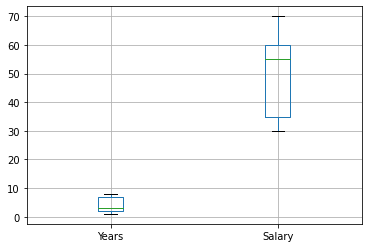

In [129]:
# print box plot here
employee.boxplot()

In [126]:
stats=employee.describe().T

stats

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


In [124]:
# print first quartile here
stats['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [125]:
# print third quartile here
stats['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [130]:
# your answer here
employee.groupby('Gender').mean().Salary

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

Yes, it's different.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

# Minimum

In [139]:
# your answer here
employee.groupby('Department').agg({'Years': 'min', 'Salary': 'min'})

,Years,Salary
Department,,
HR,2,30
IT,1,30
Sales,2,55


# Mean

In [133]:
employee.groupby('Department').agg({'Years': 'mean', 'Salary': 'mean'})

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


# Maximum

In [134]:
employee.groupby('Department').agg({'Years': 'max', 'Salary': 'max'})

,Years,Salary
Department,,
HR,8,70
IT,8,70
Sales,3,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [145]:
# your answer here
employee.groupby('Department').agg({'Salary': 'max'}) - employee.groupby('Department').agg({'Salary': 'min'})

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [156]:
# your answer here

orders = pd.read_csv('Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [157]:
orders.columns=[c.lower().replace(': ', '_') for c in orders.columns]

In [158]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed_0     397924 non-null  int64  
 1   invoiceno     397924 non-null  int64  
 2   stockcode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   invoicedate   397924 non-null  object 
 10  unitprice     397924 non-null  float64
 11  customerid    397924 non-null  int64  
 12  country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [160]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [162]:
orders.shape

(397924, 14)

There are 397.924 records. The unnamed_0 (now changed) and invoiceno seem to be internal codes. Therefore, there isn't any goal to analyse the above statistics. It appears we have records from 2010 (min) to 2011 (max), and mostly are from 2011 (check the mean and quartiles). We have records from all months of the year, from 6h to 20h. The minimum order was of 1 quantity, the maximum of 80.995, an average of 13.02 units with a standard deviation of 180.42 units. They were quantities that were sold a 0 cost, maximum at 8142.75 cost, and on average 3.12 approx.

####  What is the average Purchase Price?

In [164]:
# your answer here

orders.unitprice.mean() * orders.quantity.mean()

40.57827334161581

#### What were the highest and lowest purchase prices? 

In [165]:
# your answer here
print('highest:', orders.unitprice.max() * orders.quantity.max(), 'lowest:', orders.unitprice.min() * orders.quantity.min())

highest: 659522036.25 lowest: 0.0


#### Select all the customers we have in Spain

In [172]:
# your answer here

spain = orders.loc[orders.country == 'Spain']
spain.head()

,unnamed_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [174]:
# your answer here
spain.customerid.value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [177]:
# your answer here
spain.loc[(spain['quantity'] > 50)].groupby('customerid').sum().quantity

customerid
12454     632
12484      60
12507     656
12546      96
12557    4042
12596      96
12597     216
Name: quantity, dtype: int64

#### Select orders from Spain that are above 50 items

In [178]:
# your answer here
spain.loc[(spain['quantity'] > 50)].groupby('invoiceno').sum().quantity

invoiceno
536944     400
540785    1008
547972     450
558871    1264
561669     656
564734      60
567968      96
571255     632
571851      96
573362     216
578321     920
Name: quantity, dtype: int64

#### Select all free orders

In [179]:
# your answer here
spain.loc[(spain['unitprice'] == 0)].groupby('invoiceno').sum().quantity

invoiceno
561669    11
Name: quantity, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [194]:
# your answer here
spain['invoiceno'][spain.description.str.contains('lunch bag')]

4250      536944
4251      536944
4252      536944
4253      536944
4254      536944
29846     540469
29847     540469
29848     540469
29849     540469
29850     540469
79735     546755
85470     547387
85471     547387
91155     547972
91156     547972
91157     547972
91158     547972
91159     547972
113113    550911
113116    550911
147387    555470
147393    555470
147394    555470
147395    555470
154263    556241
160175    557007
160178    557007
160180    557007
160202    557007
162909    557303
174441    558871
174442    558871
174443    558871
174444    558871
174445    558871
176818    559148
193377    561093
213108    563477
213109    563477
213111    563477
224903    564734
224909    564734
224913    564734
224914    564734
224915    564734
230841    565519
250599    567653
323722    574550
323743    574550
323748    574550
351192    577039
366326    578321
394711    581193
394712    581193
394713    581193
Name: invoiceno, dtype: int64

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [196]:
# your answer here
spain['invoiceno'][(spain.description.str.contains('lunch bag')) & (spain.year == 2011)]

29846     540469
29847     540469
29848     540469
29849     540469
29850     540469
79735     546755
85470     547387
85471     547387
91155     547972
91156     547972
91157     547972
91158     547972
91159     547972
113113    550911
113116    550911
147387    555470
147393    555470
147394    555470
147395    555470
154263    556241
160175    557007
160178    557007
160180    557007
160202    557007
162909    557303
174441    558871
174442    558871
174443    558871
174444    558871
174445    558871
176818    559148
193377    561093
213108    563477
213109    563477
213111    563477
224903    564734
224909    564734
224913    564734
224914    564734
224915    564734
230841    565519
250599    567653
323722    574550
323743    574550
323748    574550
351192    577039
366326    578321
394711    581193
394712    581193
394713    581193
Name: invoiceno, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

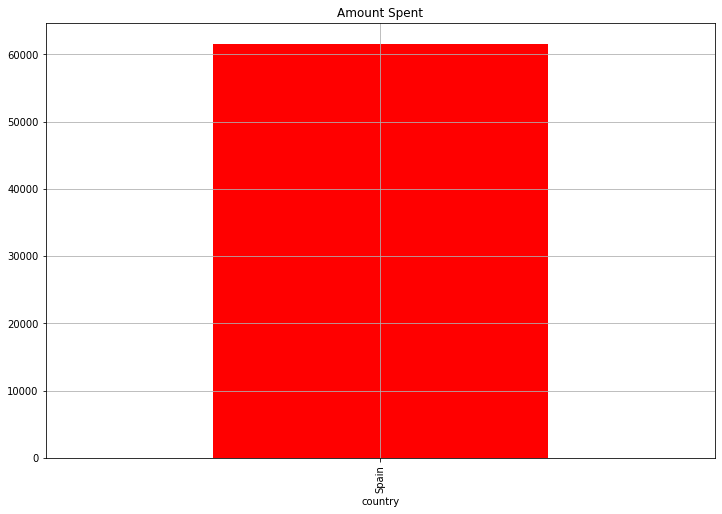

In [200]:
# your answer here

ax=spain.groupby('country').sum().amount_spent.plot(kind='bar', color=['r', 'b'], grid=True, figsize=(12, 8), title='Amount Spent')

#### Select all orders made in the month of August

In [209]:
# your answer here

orders[(orders ['month'] == 8)]

,unnamed_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [219]:
# your answer here

orders[(orders ['month'] == 8)].value_counts().groupby('country').count()

country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
dtype: int64

#### What's the  average amount of money spent by country

In [237]:
# your answer here

amount_per_country = orders.groupby('country').mean()

In [238]:
amount_per_country['amount_spent']

country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [239]:
# your answer here

orders[(orders['amount_spent']) == orders.amount_spent.max()]

,unnamed_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
397451,540421,581483,23843,2011,12,5,9,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


#### What was the average amount spent per year ?

In [240]:
# your answer here
amount_per_year = orders.groupby('year').mean()
amount_per_year

,unnamed_0,invoiceno,month,day,hour,quantity,unitprice,customerid,amount_spent
year,,,,,,,,,
2010,19884.040482,538009.305122,12.000000,3.745528,12.897630,11.937309,3.132095,15529.088417,21.892733
2011,296660.861310,562207.976246,7.303803,3.605338,12.716328,13.098138,3.115054,15277.794830,22.430074
